# Some examples of how to load klayout technology definition

In [27]:
# Reload modules every time code is called. Set autoreload 0 to disable
%load_ext autoreload
%autoreload 2

# Jupyter notebook specific
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import phidl.technology as tech
from phidl import quickplot as qp

In [3]:
print('Initial: ', tech.active_technology)  # At first, this picks the last technology used in the klayout application
tech.set_technology_name('OLMAC')

Initial:  OLMAC


In [4]:
# Load in the layer properties, SiEPIC approach
# tech.get_technology()

# Load in the layer properties in phidl LayerSet format
# tech.get_LayerSet()

In [5]:
# Let's say for some reason you want to see the drc files
print(tech.tech_files('*.lydrc'))

['/Users/atait/.klayout/salt/soen_olmac_pdk/tech/OLMAC/drc/OLMAC.lydrc']


## Properties
Files of interest are `.xml`

In [8]:
# load in some properties generically
x = tech.tech_properties_dict()
x

{'vias': {'via': [{'name': 'NW Pad to Wiring',
    'resistance': '0.0',
    'resistivity': '0.0',
    'via_component': {'layer': 'v3', 'min_size': '10.0'},
    'component': [{'layer': 'm1_nwpad', 'inclusion': '4.0'},
     {'layer': 'm5_wiring', 'inclusion': '2.0'}]},
   {'name': 'LED Pad to Wiring',
    'resistance': '0.0',
    'resistivity': '0.0',
    'via_component': {'layer': None, 'min_size': '10.0'},
    'component': [{'layer': 'm4_ledpad', 'inclusion': '2.0'},
     {'layer': 'm5_wiring', 'inclusion': '1.0'}]},
   {'name': 'Bond Pad',
    'resistance': '0.0',
    'via_component': {'layer': 'v5', 'min_size': '40.0'},
    'component': {'layer': 'm5_wiring', 'inclusion': '5.0'}},
   {'name': 'Probe Pad',
    'resistance': '0.0',
    'via_component': {'layer': 'v5', 'min_size': '100.0'},
    'component': {'layer': 'm5_wiring', 'inclusion': '5.0'}}]},
 'waveguides': {'waveguide': [{'name': 'Strip',
    'radius': '5.0',
    'loss': '0.0',
    'component': {'layer': 'wg_full', 'width': 

In [3]:
tech.WAVEGUIDES()

{'Strip': Waveguide(components=[WaveguideComponent(layer=wg_full, width=0.5, offset=0.0)], radius=5.0, loss=0.0),
 'Ridge': Waveguide(components=[WaveguideComponent(layer=wg_full, width=0.5, offset=0.0), WaveguideComponent(layer=wg_partial, width=3, offset=0.0)], radius=20.0, loss=0.0)}

In [30]:
tech.CONDUCTORS()
x = tech.CONDUCTORS()['Silicon Rib'].doped_with('N')
y = tech.CONDUCTORS()['Silicon Rib - N']


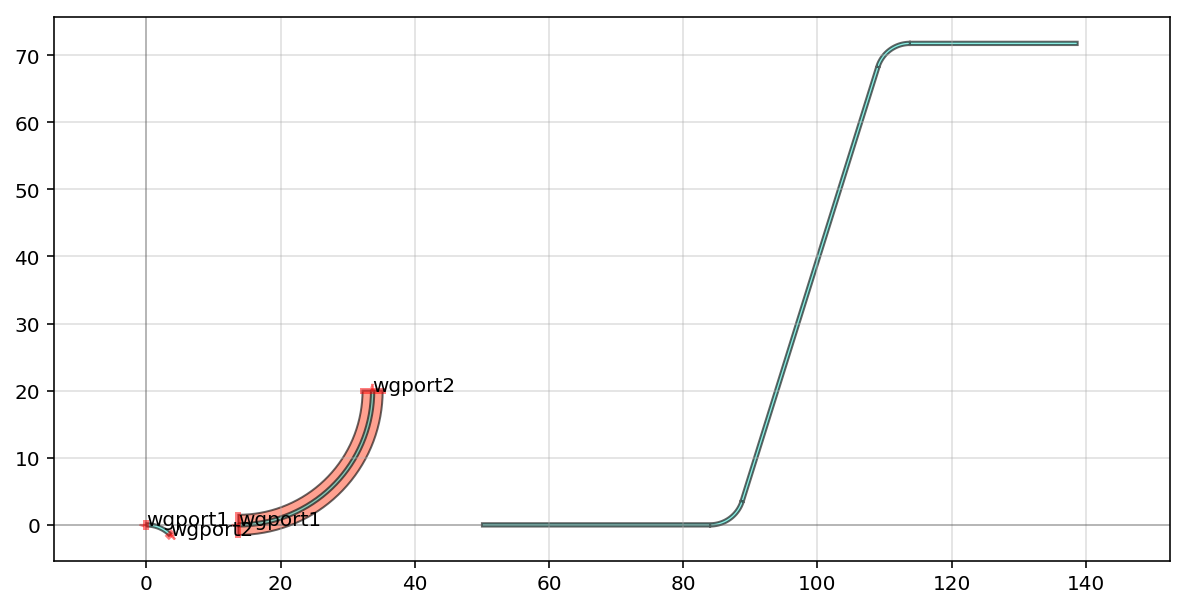

In [115]:
import phidl.geometry as pg
from phidl import Device
    

D = Device('bends')
w1 = D.add_ref(tech.WAVEGUIDES()['Strip'].cell_bend(theta=-45))
w2 = D.add_ref(tech.WAVEGUIDES()['Ridge'].cell_bend())
w2.xmin = w1.xmax + 10
qp(D)

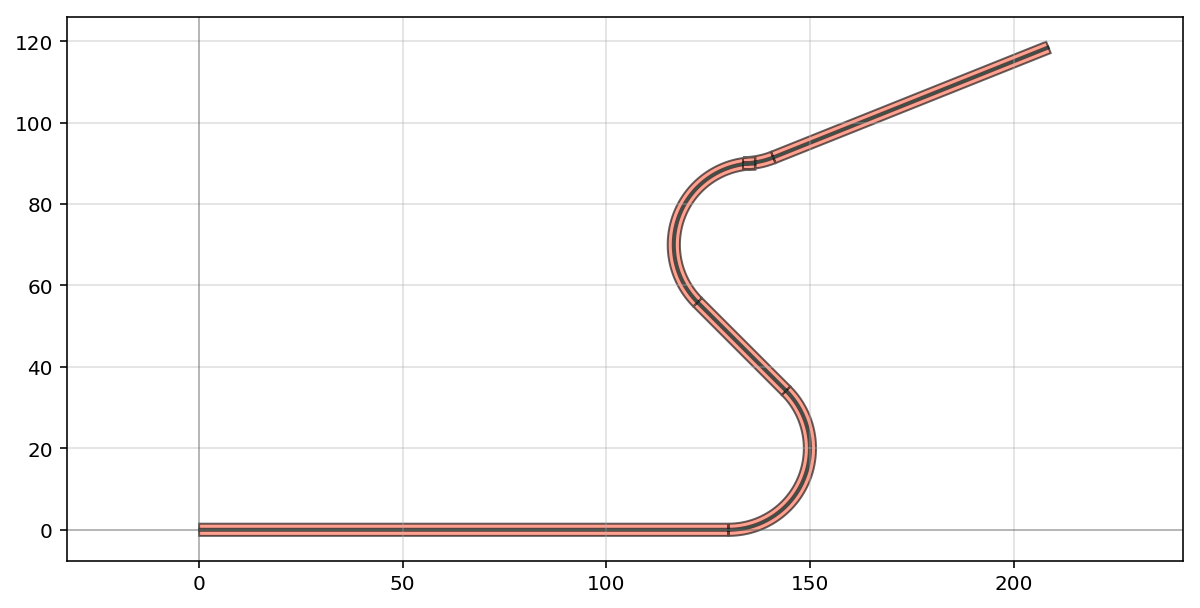

In [129]:
D = Device('routes')
zshape = [(0,0), (150, 0), (100, 50), (125, 50), (200, 80)]
w3 = D.add_ref(tech.WAVEGUIDES()['Ridge'].cell_points(zshape))
qp(D)